# Classification Project: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

As a Data scientist at AllLife bank, I have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

## Loading the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
Loan = pd.read_csv('/content/drive/MyDrive/Python Course/Loan_Modelling.csv')
data = Loan.copy()

## Data Overview

* Observations
* Sanity checks

In [4]:
#first 5 rows
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
#last 5 rows
data.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [6]:
data.shape
#There are 5000 rows and 14 columns in the data

(5000, 14)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [9]:
data = data.drop(columns ='ID')
data

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [10]:
data["Education"].replace(1, "Undergraduate", inplace=True)
data["Education"].replace(2, "Graduate", inplace=True)
data["Education"].replace(3, "Professional", inplace=True)

#1 = Undergrad, 2 = Graduate, 3 = Advanced/Professional

In [11]:
data[data["Experience"] < 0]["Experience"].unique()
#checking if experience <0 (input errors)

array([-1, -2, -3])

In [12]:
#Corrections:
data["Experience"].replace(-1, 1, inplace=True)
data["Experience"].replace(-2, 2, inplace=True)
data["Experience"].replace(-3, 3, inplace=True)

**Feature Engineering**

In [13]:
# checking uniques in the zip code
data["ZIPCode"].nunique()

467

In [14]:
data["ZIPCode"] = data["ZIPCode"].astype(str)
print(
    "Number of unique values if we take first two digits of ZIPCode: ",
    data["ZIPCode"].str[0:2].nunique(),
)
data["ZIPCode"] = data["ZIPCode"].str[0:2]

data["ZIPCode"] = data["ZIPCode"].astype("category")

Number of unique values if we take first two digits of ZIPCode:  7


In [15]:
#Converting data type of categorical features to 'category'
cat_cols = [
    "Education",
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
    "ZIPCode",
]

data[cat_cols] = data[cat_cols].astype("category")

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

## Univariate Analysis (EDA)

In [16]:
#Setting up function for combination of boxplot and histogram
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [17]:
# Setting up function for labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):


    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # % of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2
        y = p.get_height()

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the %

    plt.show()

**Boxplot and Histogram of Age**

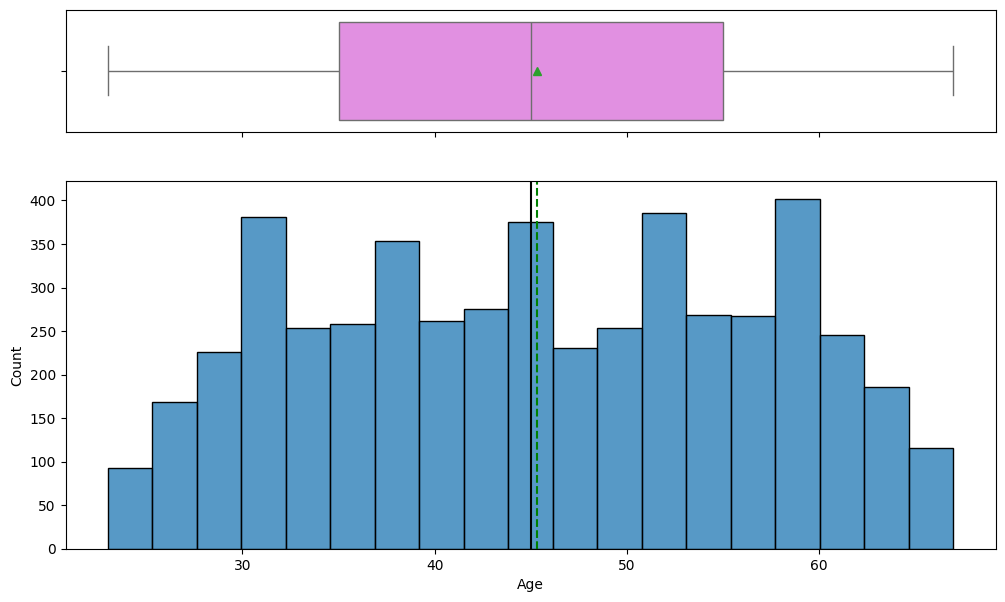

In [18]:
histogram_boxplot(data, "Age")

**Boxplot and Histogram of Experience**

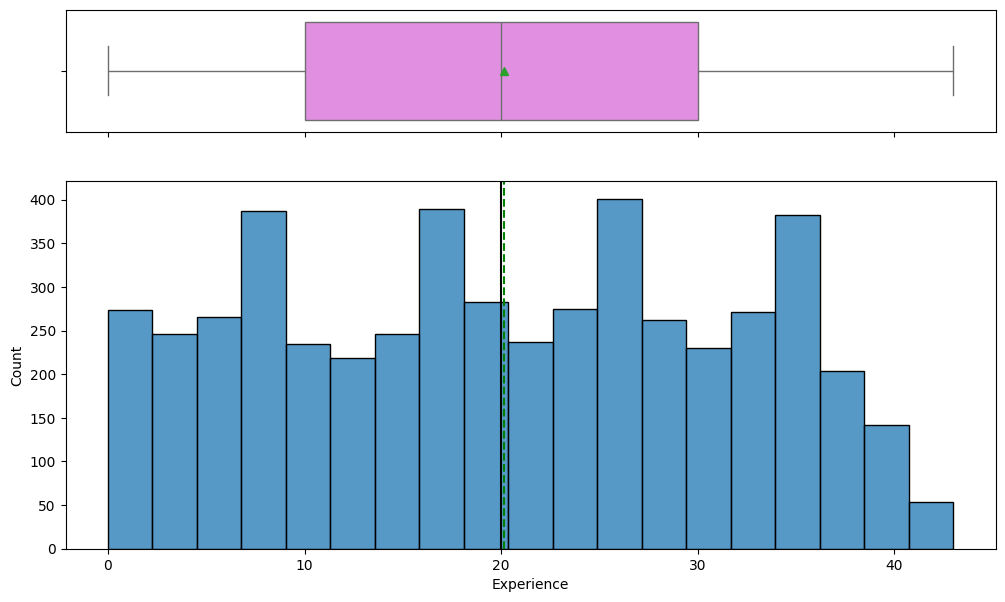

In [19]:
histogram_boxplot(data,'Experience')

**Boxplot and Histogram of Income**

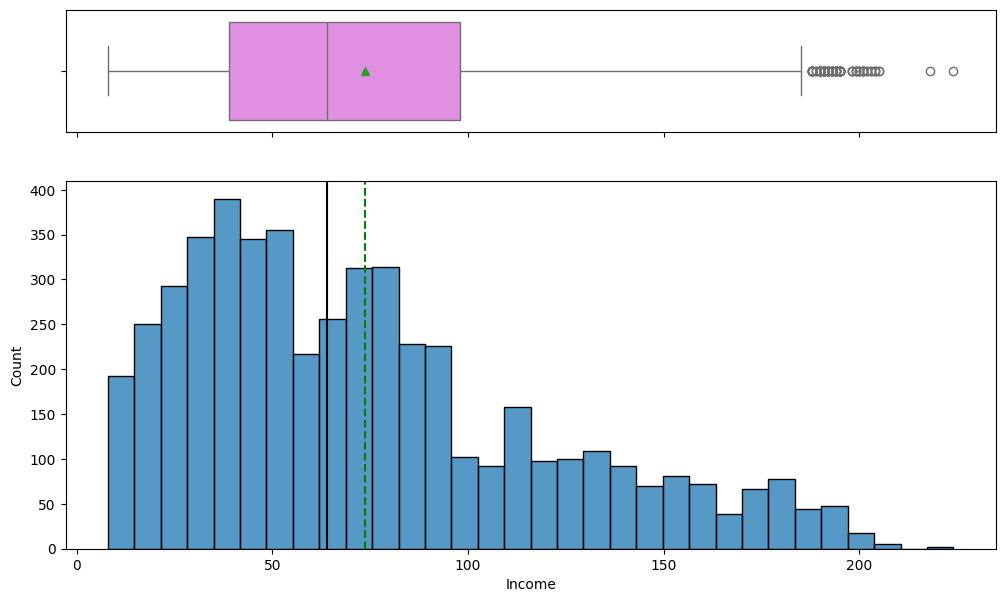

In [20]:
histogram_boxplot(data, 'Income')

**Boxplot and Histogram of Credit Card Spending per Month** (in thousand dollars)

(106, 13)

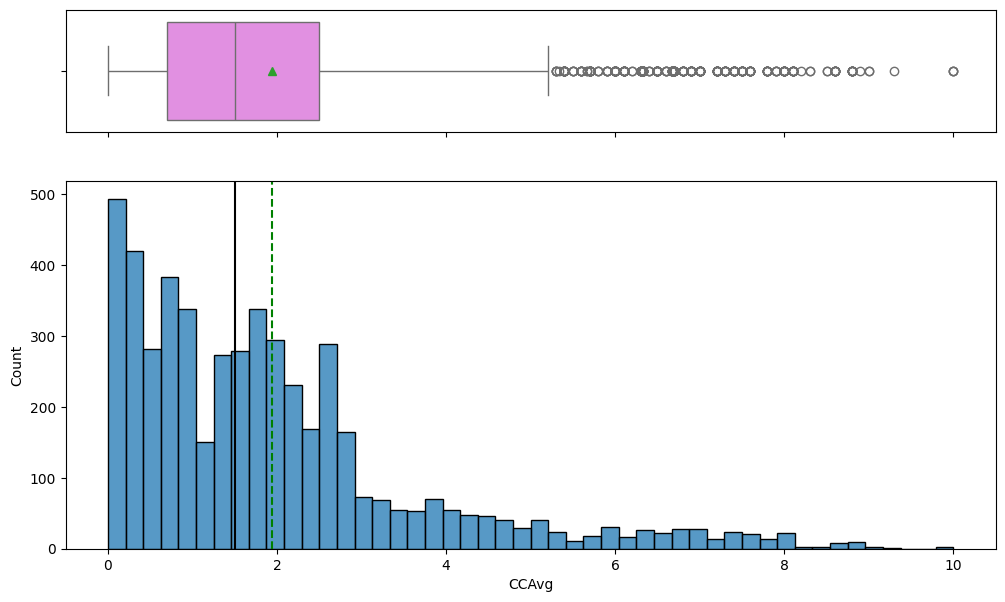

In [21]:
histogram_boxplot(data, 'CCAvg')
zero_spending_customers = data[data['CCAvg'] == 0]
zero_spending_customers.shape

There are **106** customers who do not use their Credit Cards.

**Boxplot and Histogram of Mortgage**

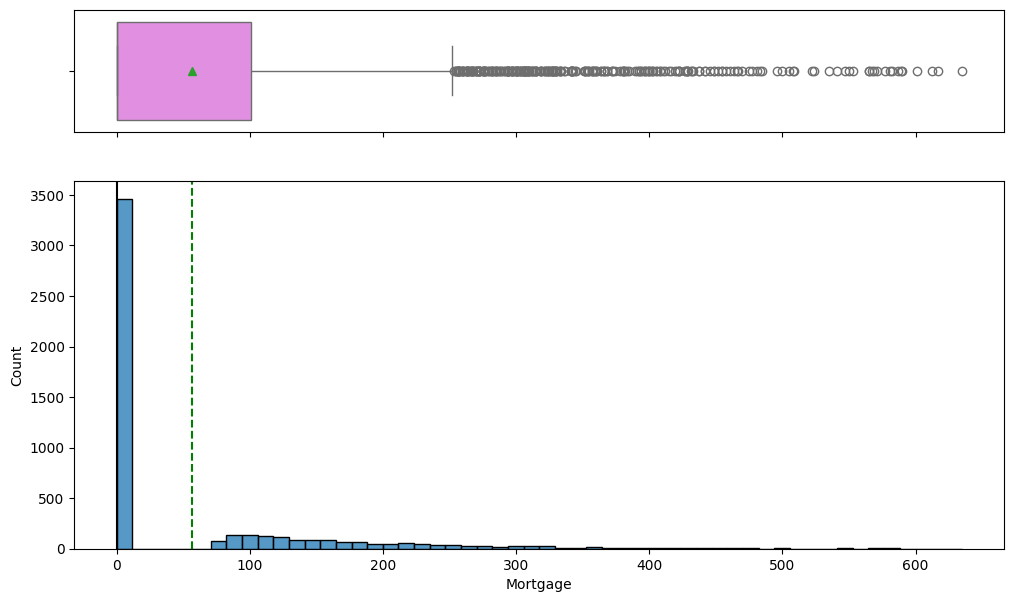

In [22]:
histogram_boxplot(data, 'Mortgage')
#Interesting results, majority have no mortgage which skews data. Big $ difference between no mortgage (0$) and mortgage (Hundreds of Thousands of $)

After analyzing the distribution of mortgage, there is a large discrepancy between those who have mortgage and those who don't. The majority of people in the data do not have a mortgage, but since this is a numeric variable and not a boolean variable, those who do have a mortgage have a wide distribution of values. Further digging can be done to this variable if needed where those who do not have mortgage can be temporarily removed from the data to get a better understanding of the mortgages' statistical values.

**Labeled Barplot of Family Size**

<ipython-input-17-9707ddabc274>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


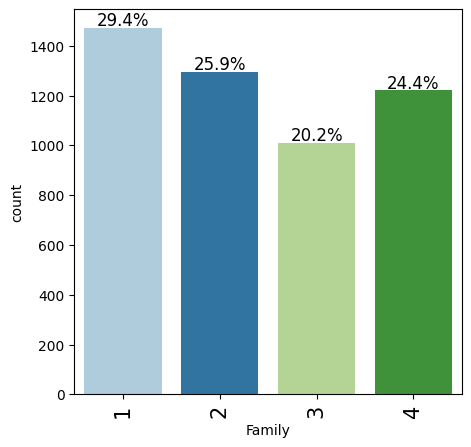

In [23]:
labeled_barplot(data, "Family", perc=True)

**Labeled Barplot of Education**

<ipython-input-17-9707ddabc274>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


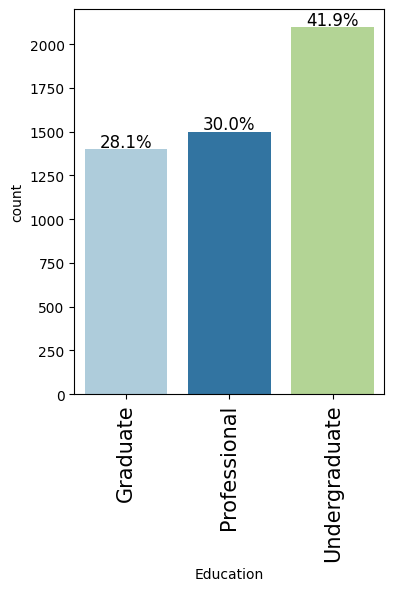

In [24]:
labeled_barplot(data, "Education", perc=True)

**Labeled Barplot of Securities Account**

<ipython-input-17-9707ddabc274>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


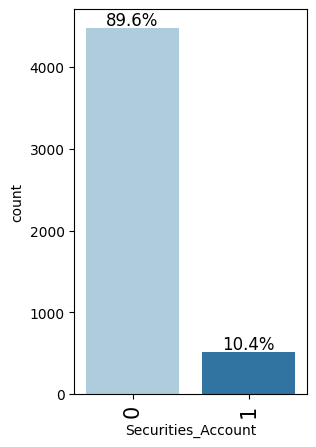

In [25]:
labeled_barplot(data, "Securities_Account", perc=True)

**Labeled Barplot of CD Account**

<ipython-input-17-9707ddabc274>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


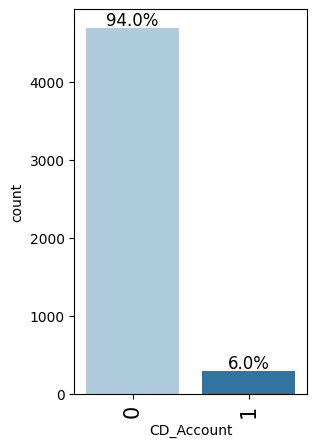

In [26]:
labeled_barplot(data, "CD_Account", perc=True)

**Labeled Barplot of Internet Banking Facilities**

<ipython-input-17-9707ddabc274>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


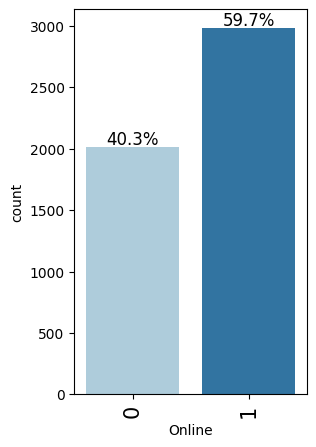

In [27]:
labeled_barplot(data, "Online", perc=True)

**Labeled Barplot of CreditCard** (cards excluding All Life Bank)

<ipython-input-17-9707ddabc274>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


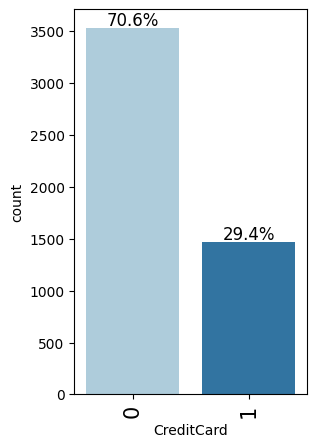

In [28]:
labeled_barplot(data, "CreditCard", perc=True)

**Labeled Barplot of ZIPCode**

<ipython-input-17-9707ddabc274>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


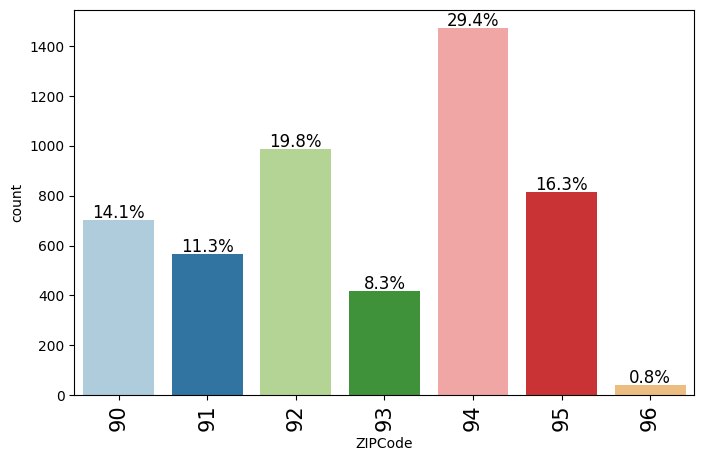

In [29]:
labeled_barplot(data, "ZIPCode", perc=True)

## Bivariate Analysis (EDA)

In [30]:
#Function for stacked barplot:
def stacked_barplot(data, predictor, target):

    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [31]:
#Function to plot distributions wrt target:
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

**Heatmap**

<ipython-input-32-9f90893c3f45>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")


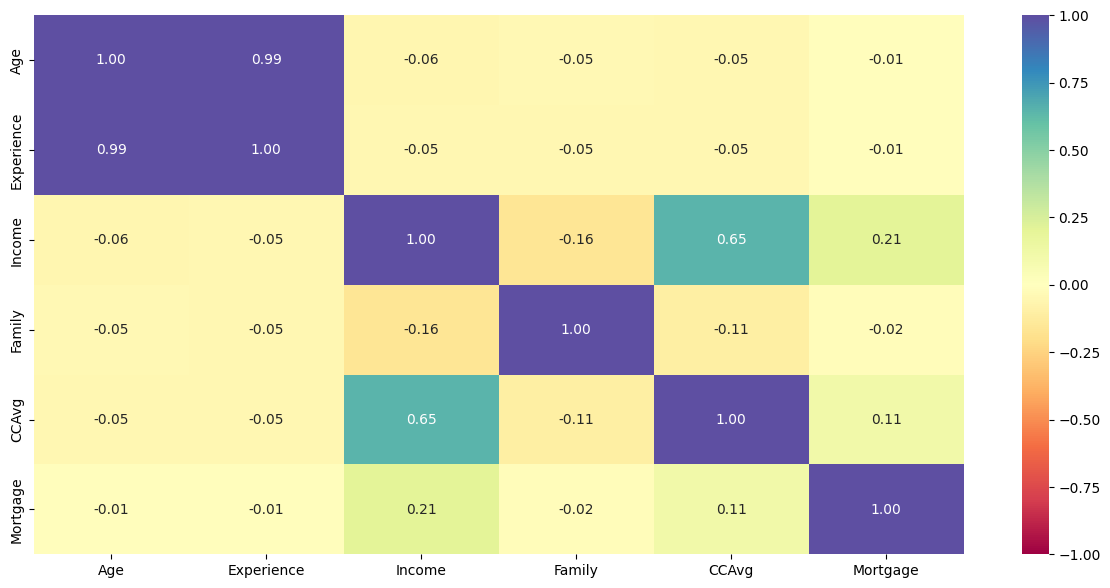

In [32]:
#Checking correlations of variables
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

There are very strong correlations between Age and Experience (which makes sense considering the older you are, the more experience you have). Additionally, Income and CCAvg have a strong correlation as well, signifying that the more you make, the more you spend. More insights will come to the surface once we dive deeper into the data.

**Stacked Barplot for "Education" vs "Personal_Loan"**

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
Professional   1296  205  1501
Graduate       1221  182  1403
Undergraduate  2003   93  2096
------------------------------------------------------------------------------------------------------------------------


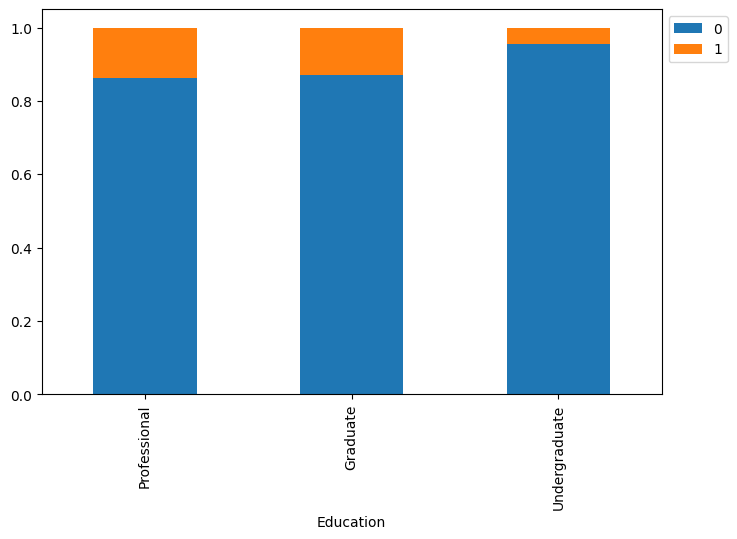

In [33]:
stacked_barplot(data, "Education", "Personal_Loan")

The majority of folks who take out a Personal Loan are professionals (43% of customers who have taken out a loan).

**Stacked Barplot for "Family" vs "Personal_Loan"**

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


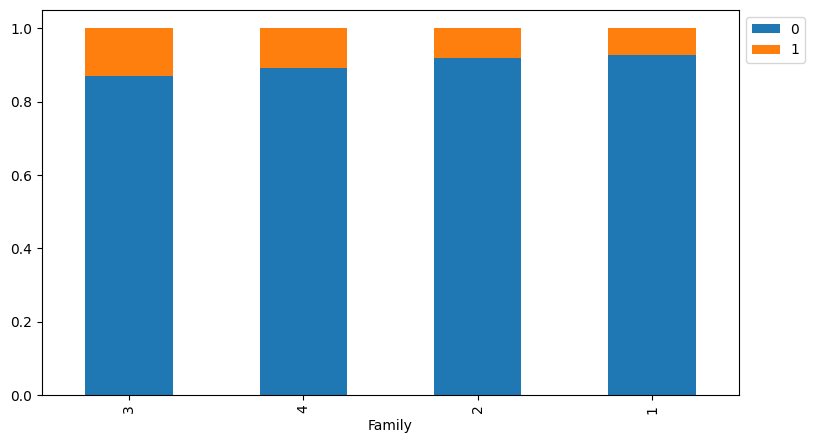

In [34]:
stacked_barplot(data, "Family", "Personal_Loan")

**Stacked Barplot for "Securities_Account" vs "Personal_Loan"**

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


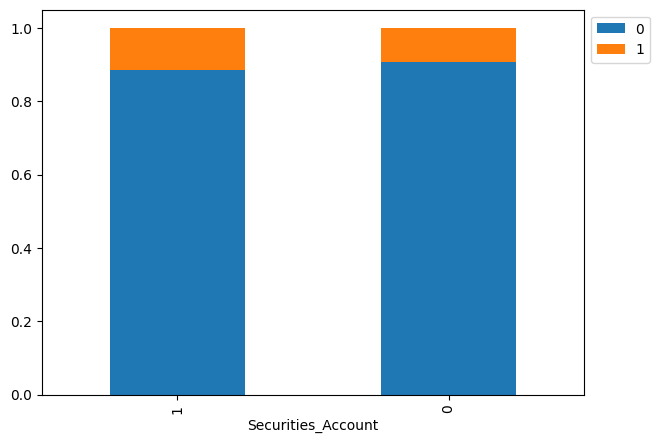

In [35]:
stacked_barplot(data, "Securities_Account", "Personal_Loan")

**Stacked Barplot for "CD_Account" vs "Personal_Loan"**



Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


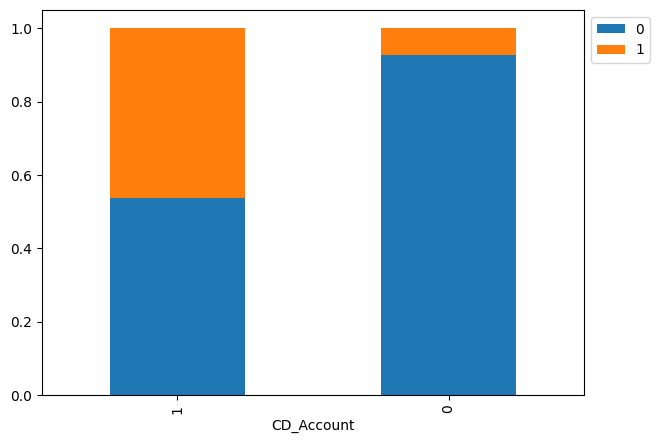

In [36]:
stacked_barplot(data, "CD_Account", "Personal_Loan")

Those with a CD account are **much more likely** to take out a personal loan.

**Stacked Barplot for "Online" vs "Personal_Loan"**

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


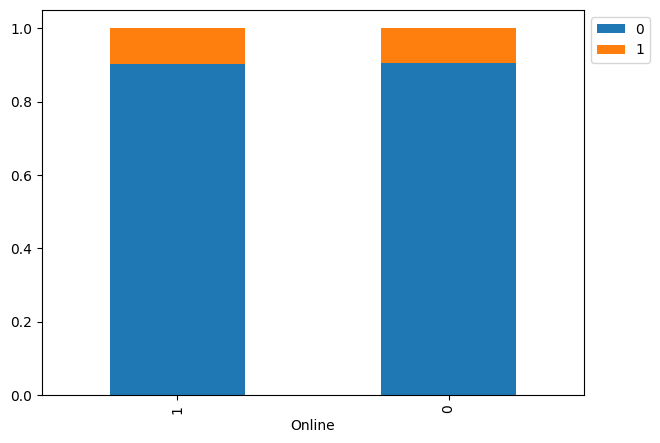

In [37]:
stacked_barplot(data, "Online", "Personal_Loan")

**Stacked Barplot for "CreditCard" vs "Personal_Loan"**

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


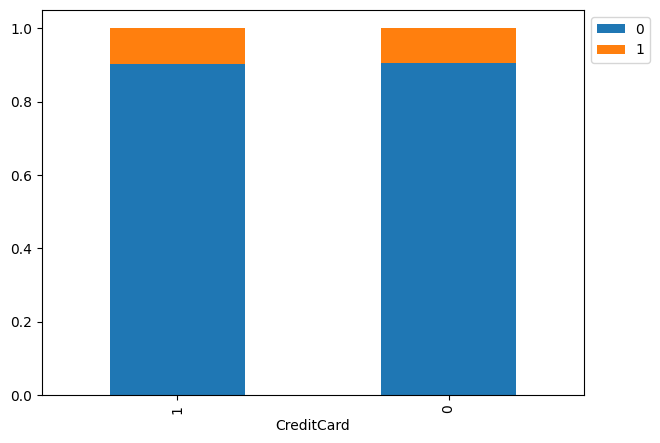

In [38]:
stacked_barplot(data, "CreditCard", "Personal_Loan")

**Stacked Barplot for "ZIPCode" vs "Personal_Loan"**

Personal_Loan     0    1   All
ZIPCode                       
All            4520  480  5000
94             1334  138  1472
92              894   94   988
95              735   80   815
90              636   67   703
91              510   55   565
93              374   43   417
96               37    3    40
------------------------------------------------------------------------------------------------------------------------


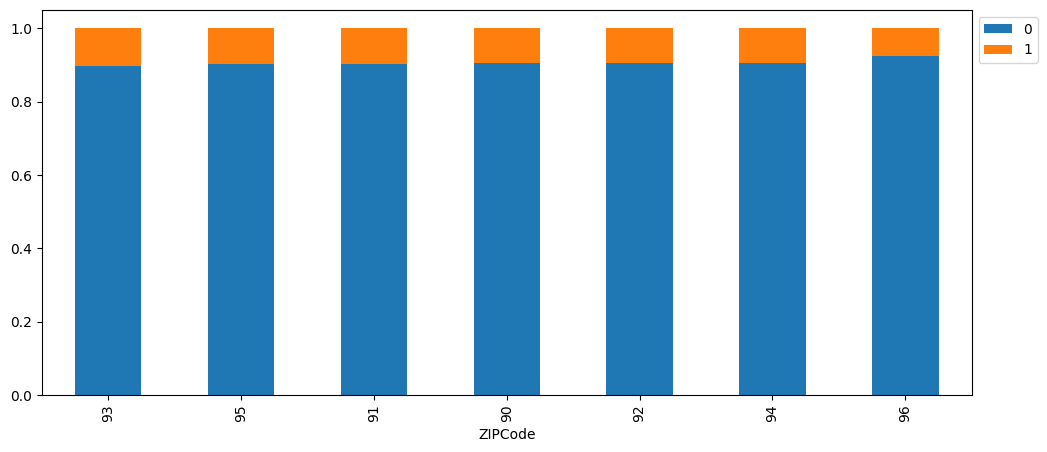

In [39]:
stacked_barplot(data, "ZIPCode", "Personal_Loan")

Relatively similar across all 7 zip codes.

**"Age" vs "Personal_Loan" Distribution**

<ipython-input-31-4e87ba741d2e>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
<ipython-input-31-4e87ba741d2e>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


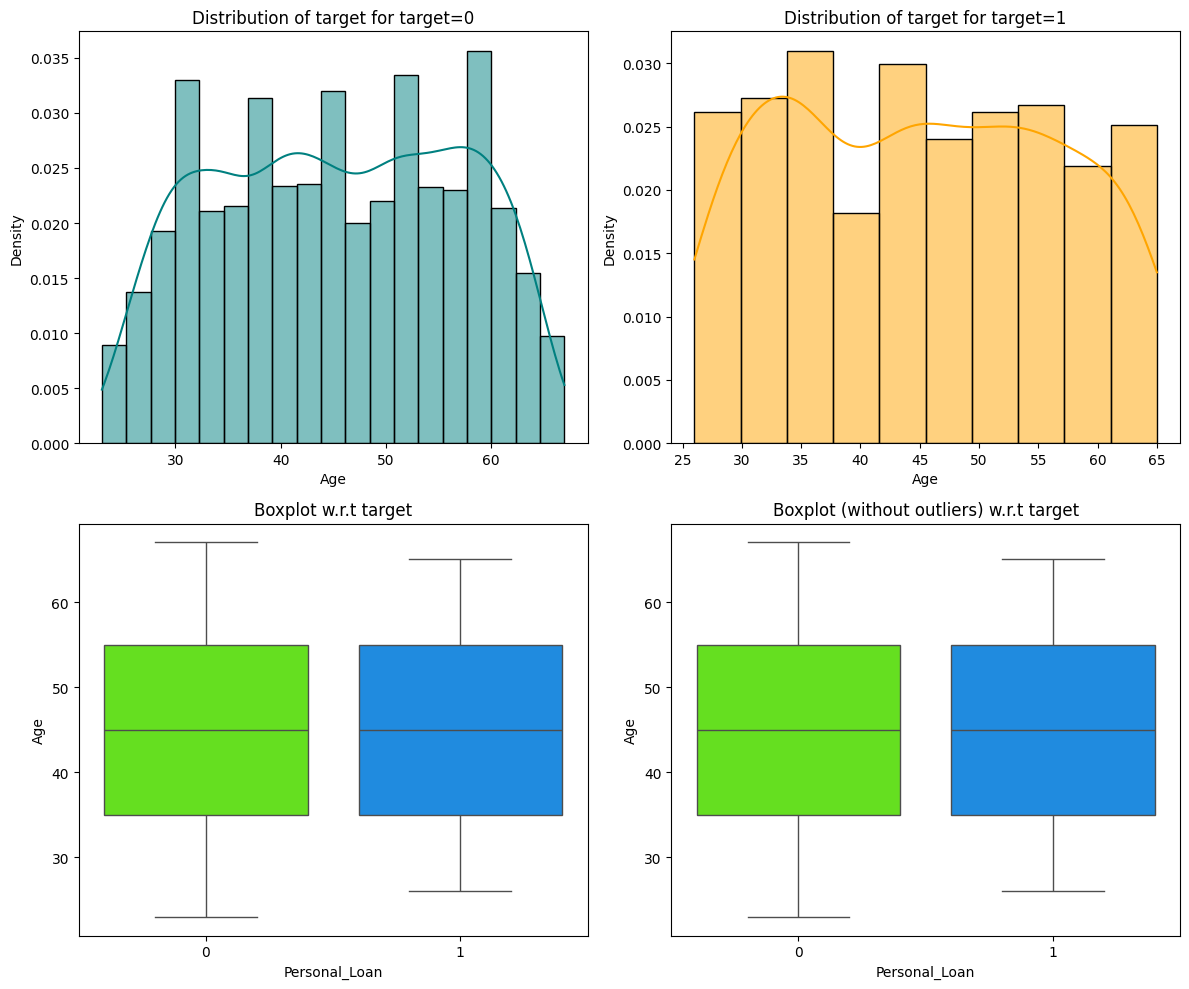

In [40]:
distribution_plot_wrt_target(data,"Age", "Personal_Loan")

The youngest person to take out a Personal Loan was **26** years old. The ages range uniformly until **65**, representing the oldest customer to take out a loan.

**"Experience" vs "Personal_Loan" Distribution**

<ipython-input-31-4e87ba741d2e>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
<ipython-input-31-4e87ba741d2e>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


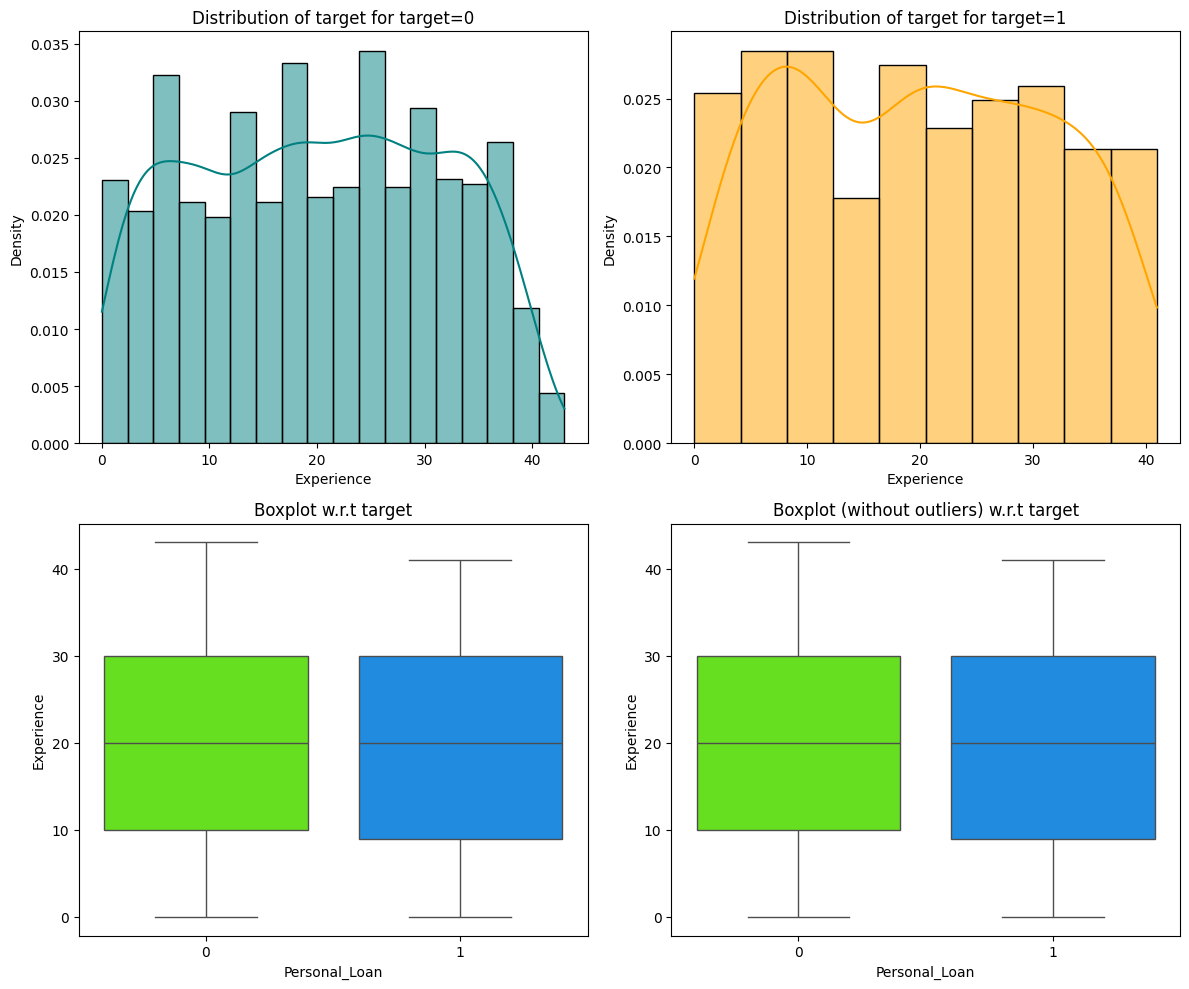

In [41]:
distribution_plot_wrt_target(data,"Experience", "Personal_Loan")

**"Income" vs "Personal_Loan" Distribution**

<ipython-input-31-4e87ba741d2e>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
<ipython-input-31-4e87ba741d2e>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


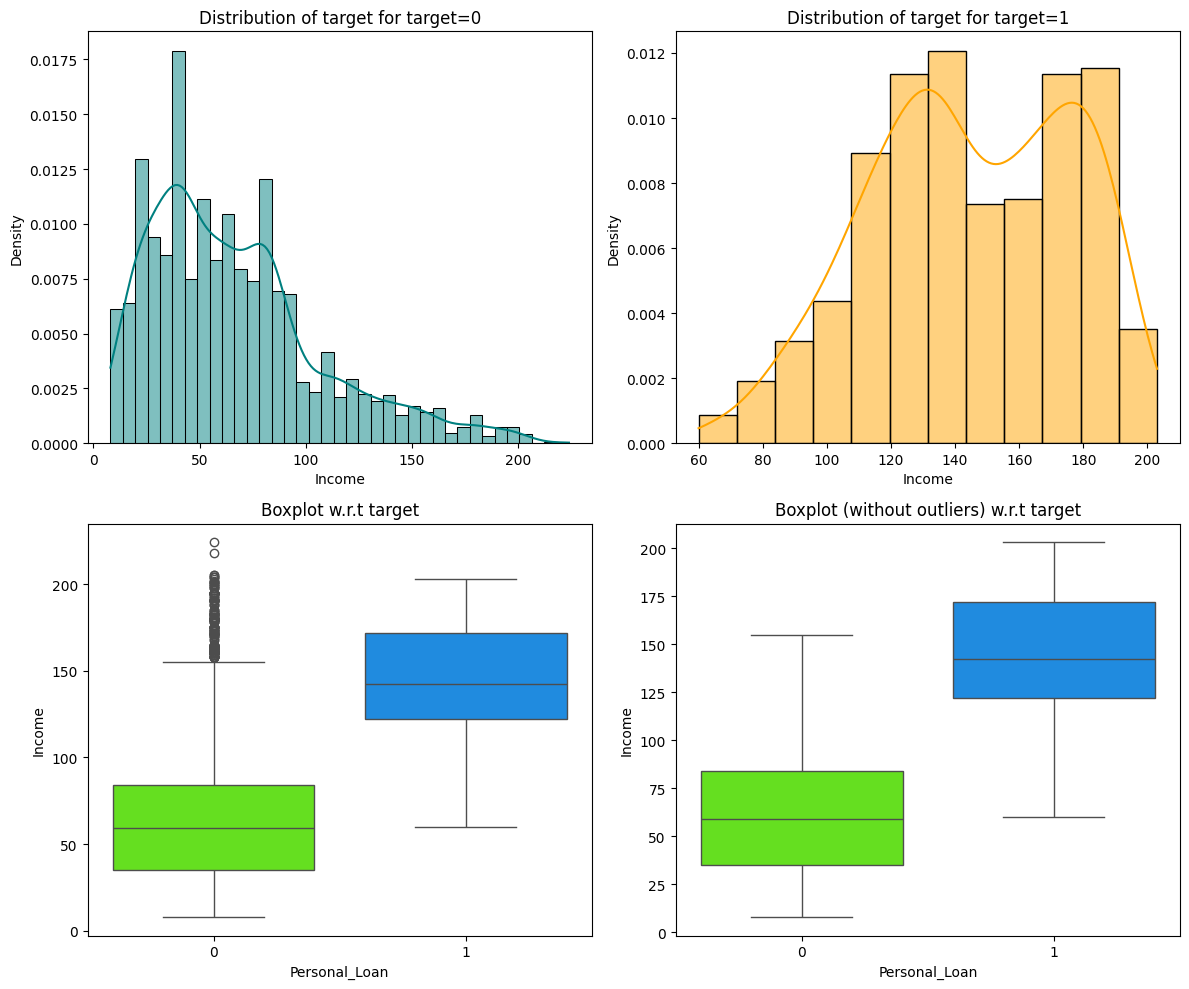

In [42]:
distribution_plot_wrt_target(data,"Income", "Personal_Loan")

**"CCAvg" vs "Personal_Loan" Distribution**

<ipython-input-31-4e87ba741d2e>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
<ipython-input-31-4e87ba741d2e>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


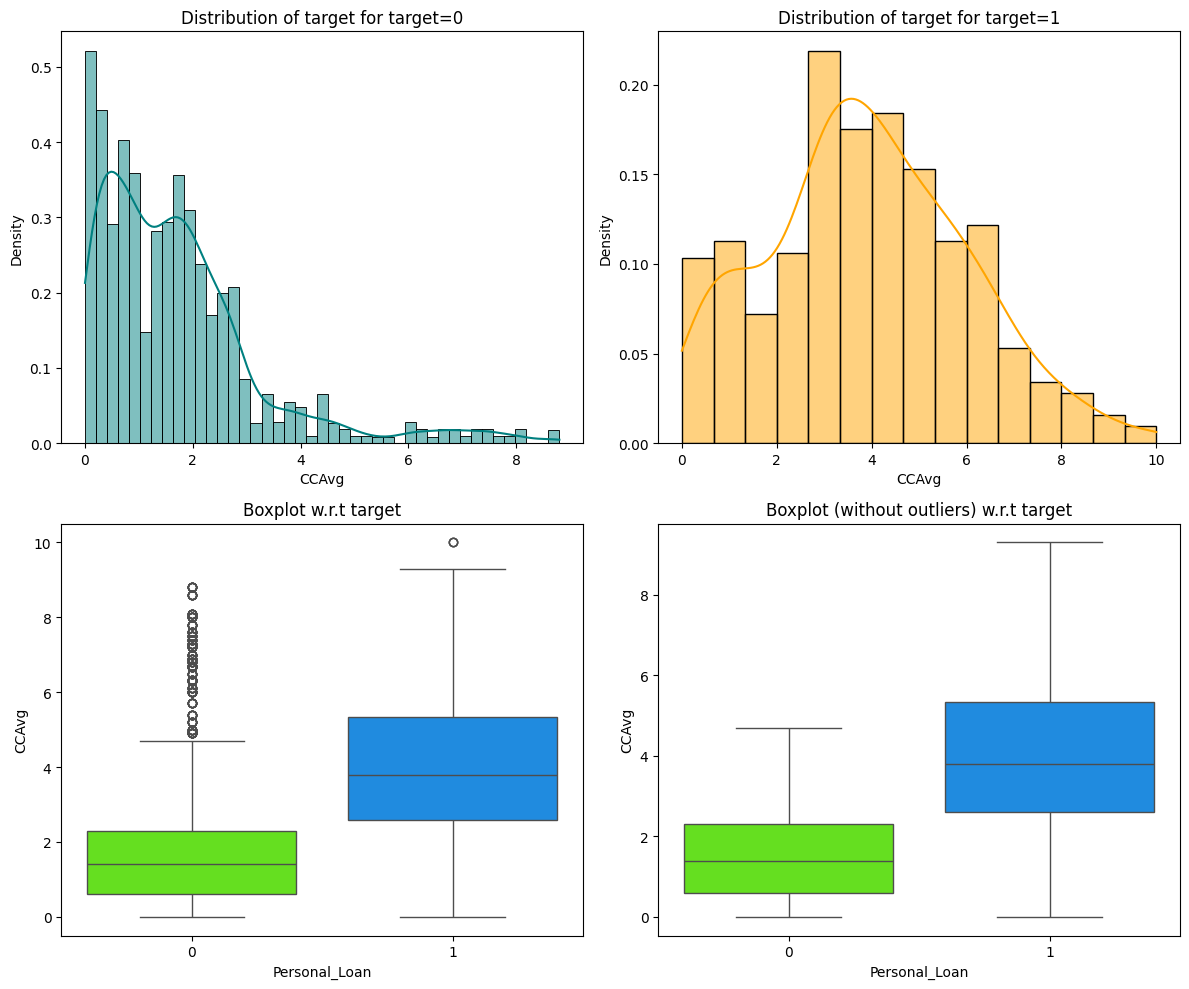

In [43]:
distribution_plot_wrt_target(data,"CCAvg", "Personal_Loan")

## Data Preprocessing (Contd.)

**Outlier Detection**

In [44]:
Q1 = data.quantile(.25)
Q3 = data.quantile(.75)

IQR = Q3 - Q1               # Inter Quantile Range (75th perentile - 25th percentile)

lower = Q1 - 1.5 * IQR  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper = Q3 + 1.5 * IQR

<ipython-input-44-b02203ff4022>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = data.quantile(.25)
<ipython-input-44-b02203ff4022>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = data.quantile(.75)


In [45]:
((data.select_dtypes(include=["float64", "int64"]) < lower)
    |(data.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(data) * 100

Age           0.00
Experience    0.00
Income        1.92
Family        0.00
CCAvg         6.48
Mortgage      5.82
dtype: float64

**Data Prep for Modeling**

In [46]:
# Separate independent and dependent variable
X = data.drop(["Personal_Loan", "Experience"], axis=1)
Y = data["Personal_Loan"]

In [47]:

X = pd.get_dummies(X, columns=["ZIPCode", "Education"], drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [48]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 17)
Shape of test set :  (1500, 17)
Percentage of classes in training set:
0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0    0.900667
1    0.099333
Name: Personal_Loan, dtype: float64


## Model Building

### Model Evaluation Criterion

* Wrong prediction outcomes:
  1. Loss of resources: falsely predicting customer will take a loan (does not take loan)
  2. Loss of opportunity: falsely predicting customer will not take a loan (planned on taking a loan) ***Worse outcome***


* Maximize **RECALL**
  * Higher recall, lower false negatives.

### Model Building

In [49]:
#Function to check model performance (via sklearn)
def model_performance_classification_sklearn(model, predictors, target):

    #independent variable prediction
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  #Accuracy
    recall = recall_score(target, pred)  #Recall
    precision = precision_score(target, pred)  #Precision
    f1 = f1_score(target, pred)  #F1-score

    #dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf


In [50]:
def confusion_matrix_sklearn(model, predictors, target):
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

**Decision Tree Model**

In [51]:
# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

**Model Performance (Training Data)**

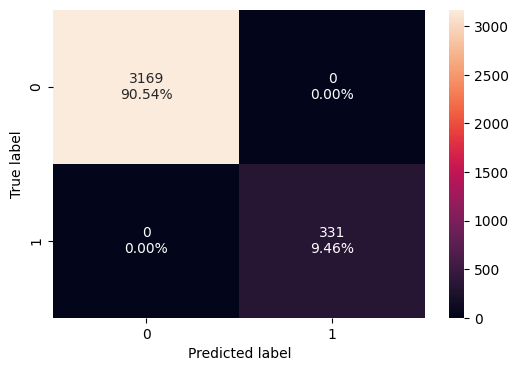

In [52]:
confusion_matrix_sklearn(model, X_train, y_train)

In [53]:
decision_tree_perf_train = model_performance_classification_sklearn(model, X_train, y_train)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


**Decision Tree Visualization**

In [54]:
feature_names = list(X_train.columns)
print(feature_names)

['Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode_91', 'ZIPCode_92', 'ZIPCode_93', 'ZIPCode_94', 'ZIPCode_95', 'ZIPCode_96', 'Education_Professional', 'Education_Undergraduate']


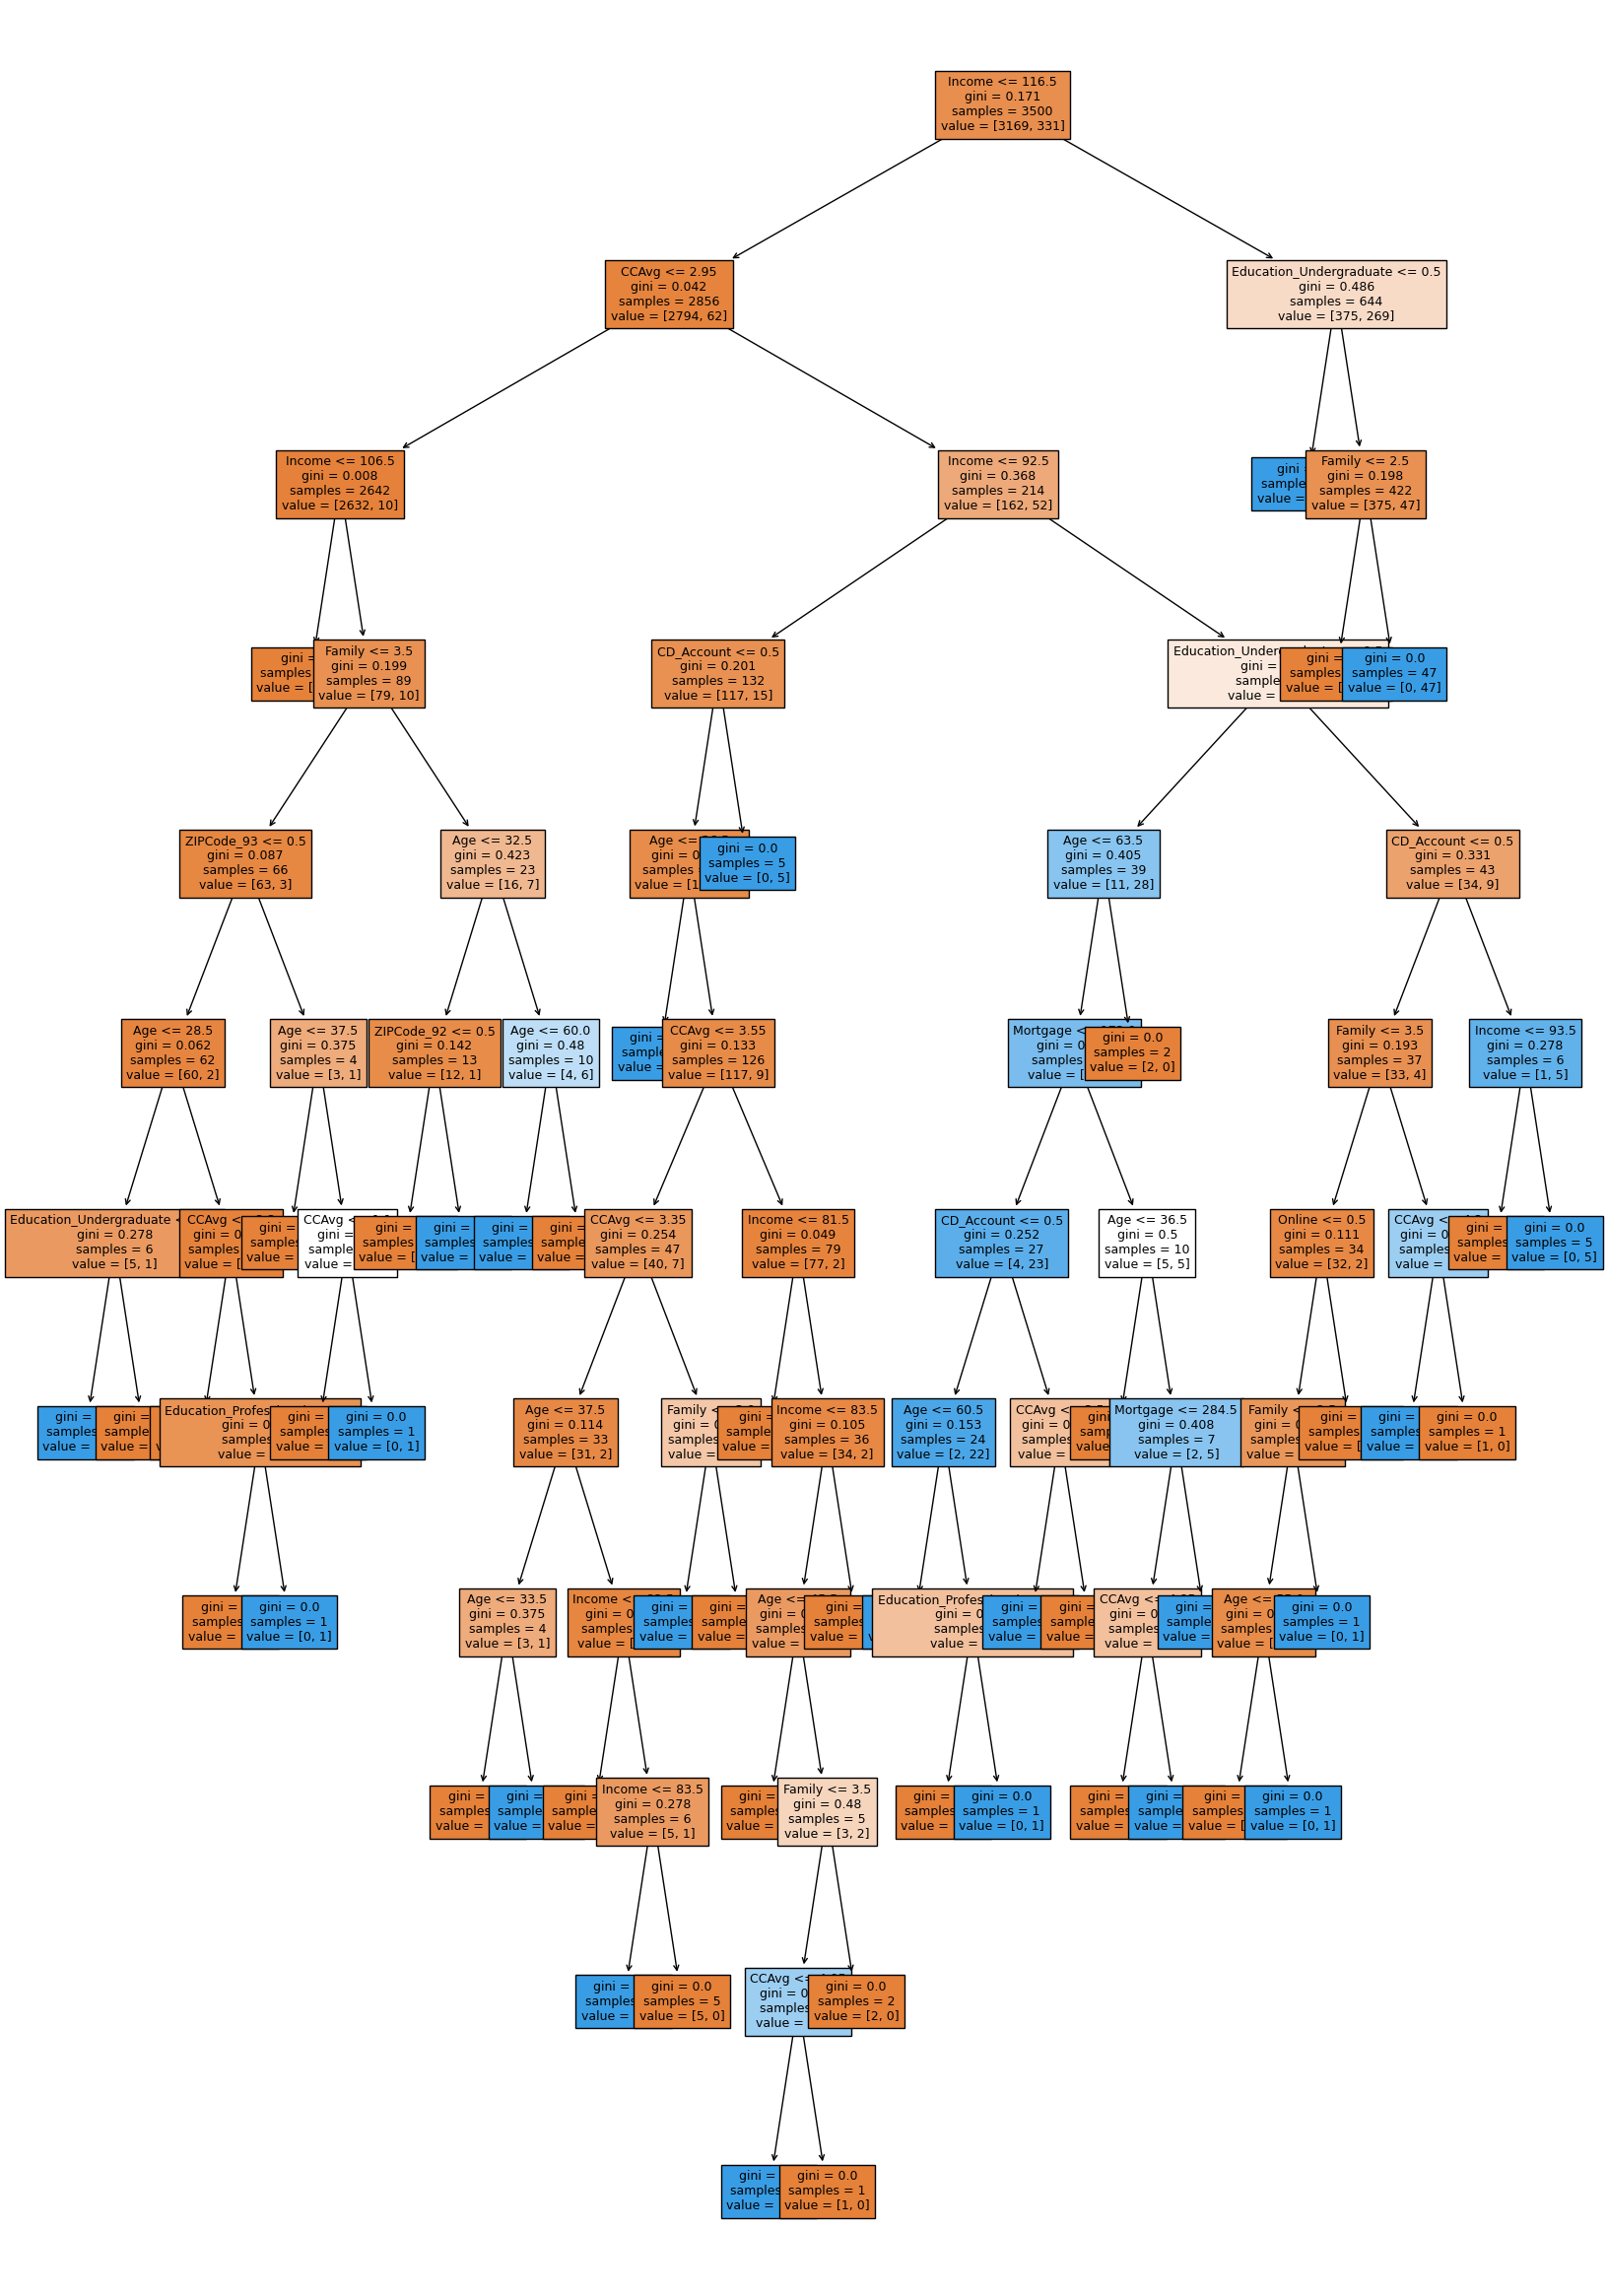

In [55]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)

In [56]:
print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- ZIPCode_93 <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Education_Undergraduate <= 0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |--- Education_Undergraduate >  0.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- CCAvg <= 2.20
|   |   |   |   |   |   |   |--- weights: [48.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  2.20
|   |   |   |   |   |   |   |--- Education_Professional <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [7.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education_Professional >  0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- ZIPCode_93

In [57]:
#Importances
print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                              Imp
Education_Undergraduate  0.403732
Income                   0.304761
Family                   0.161717
CCAvg                    0.053107
Age                      0.036035
CD_Account               0.025711
Mortgage                 0.005557
Education_Professional   0.005144
ZIPCode_92               0.003080
ZIPCode_93               0.000594
Online                   0.000561
Securities_Account       0.000000
ZIPCode_91               0.000000
ZIPCode_94               0.000000
ZIPCode_95               0.000000
ZIPCode_96               0.000000
CreditCard               0.000000


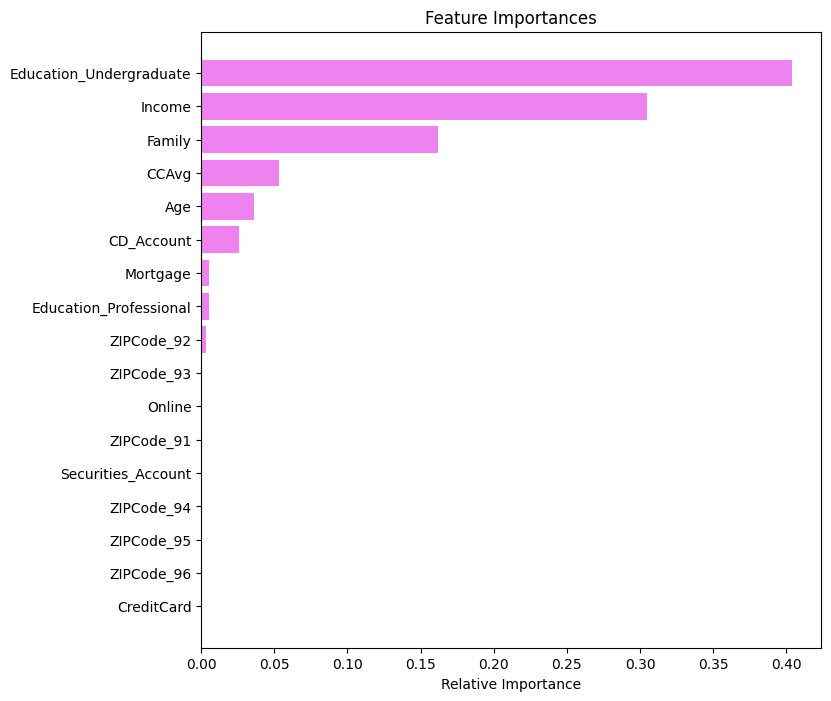

In [58]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Model Performance (Testing Data)**

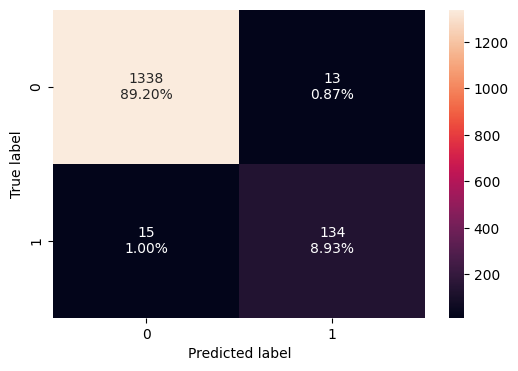

In [59]:
confusion_matrix_sklearn(model, X_test, y_test)

In [60]:
decision_tree_perf_test = model_performance_classification_sklearn(model, X_test, y_test)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.981333,0.899329,0.911565,0.905405


### Model Performance Improvement

**Pre-Prunning**

In [61]:
#Classifier type
estimator = DecisionTreeClassifier(random_state=1)

#Parameter Grid
parameters = {
    "max_depth": np.arange(6, 15),
    "min_samples_leaf": [1, 2, 5, 7, 10],
    "max_leaf_nodes": [2, 3, 5, 10],
}

# Scoring for comparing parameter combinations
acc_scorer = make_scorer(recall_score)

#Grid Search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

#Setting clf
estimator = grid_obj.best_estimator_

estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=10, random_state=1)

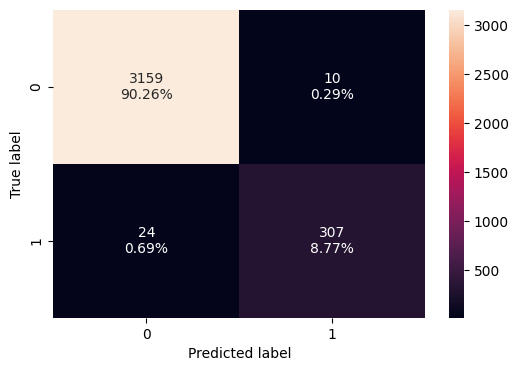

In [62]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [63]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(estimator, X_train, y_train)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.990286,0.927492,0.968454,0.947531


**Decision Tree Visualization (Pre-Pruning)**

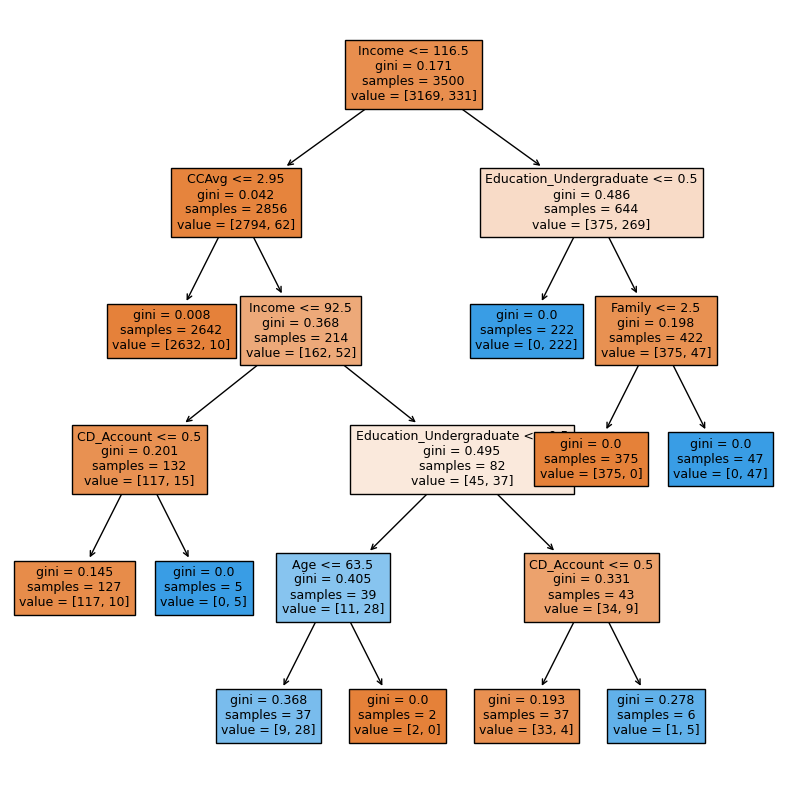

In [64]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)

In [65]:
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2632.00, 10.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- weights: [117.00, 10.00] class: 0
|   |   |   |--- CD_Account >  0.50
|   |   |   |   |--- weights: [0.00, 5.00] class: 1
|   |   |--- Income >  92.50
|   |   |   |--- Education_Undergraduate <= 0.50
|   |   |   |   |--- Age <= 63.50
|   |   |   |   |   |--- weights: [9.00, 28.00] class: 1
|   |   |   |   |--- Age >  63.50
|   |   |   |   |   |--- weights: [2.00, 0.00] class: 0
|   |   |   |--- Education_Undergraduate >  0.50
|   |   |   |   |--- CD_Account <= 0.50
|   |   |   |   |   |--- weights: [33.00, 4.00] class: 0
|   |   |   |   |--- CD_Account >  0.50
|   |   |   |   |   |--- weights: [1.00, 5.00] class: 1
|--- Income >  116.50
|   |--- Education_Undergraduate <= 0.50
|   |   |--- weights: [0.00, 222.00] class: 1
|   |--- Education_Undergraduate >  0.50
|   |   |--- Family <= 2.

In [66]:
#Importances
print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                              Imp
Education_Undergraduate  0.446191
Income                   0.327387
Family                   0.155083
CCAvg                    0.042061
CD_Account               0.025243
Age                      0.004035
Securities_Account       0.000000
Online                   0.000000
Mortgage                 0.000000
ZIPCode_91               0.000000
ZIPCode_92               0.000000
ZIPCode_93               0.000000
ZIPCode_94               0.000000
ZIPCode_95               0.000000
ZIPCode_96               0.000000
Education_Professional   0.000000
CreditCard               0.000000


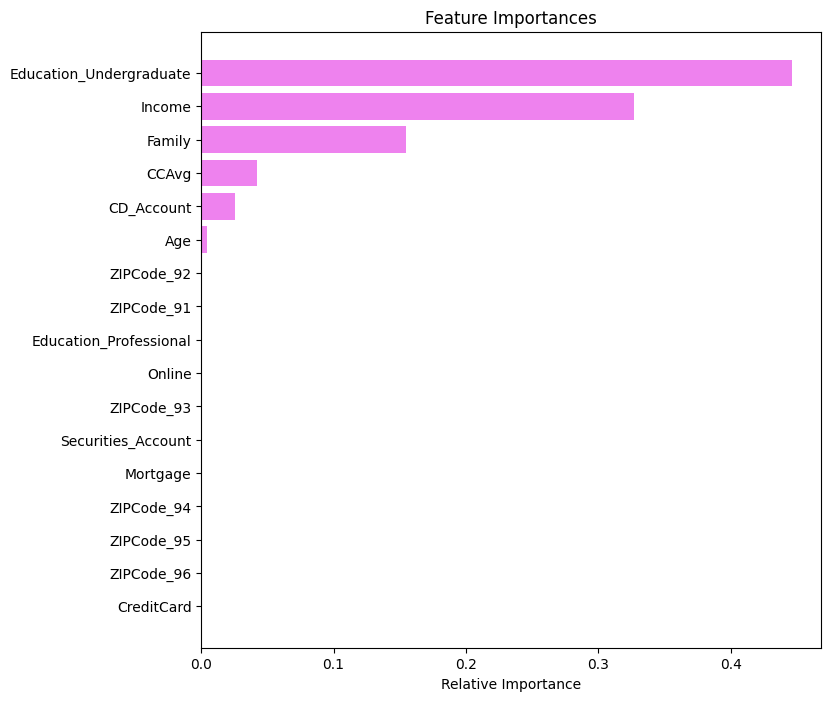

In [67]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Model Performance (Test Data)**

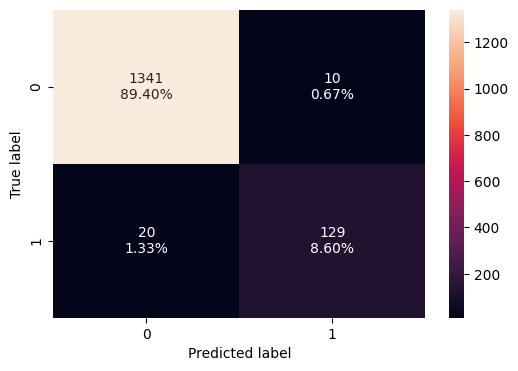

In [68]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [69]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(estimator, X_test, y_test)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.98,0.865772,0.928058,0.895833


**Cost-Complexity Pruning** (Total Impurity vs Effective Alpha)

In [70]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [71]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000214,0.000429
2,0.000223,0.001542
3,0.000242,0.002750
4,0.000268,0.003824
5,0.000359,0.004900
6,0.000381,0.005280
7,0.000381,0.005661
8,0.000381,0.006042
9,0.000381,0.006423


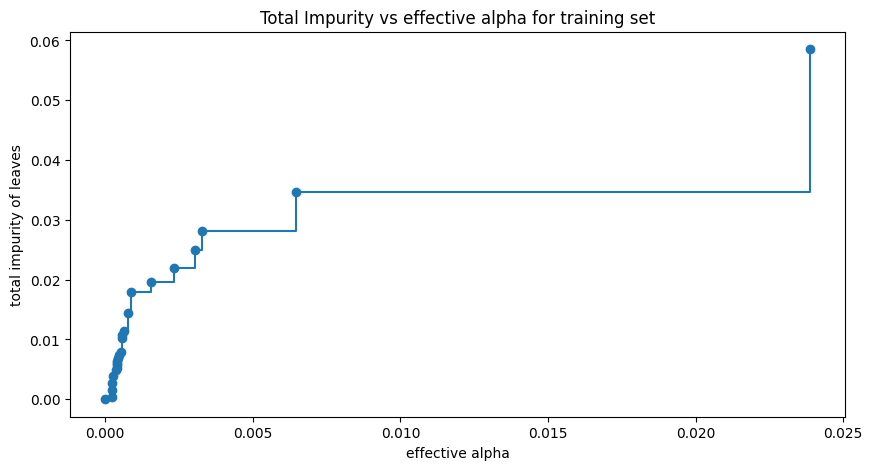

In [72]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [73]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.056364969335601575


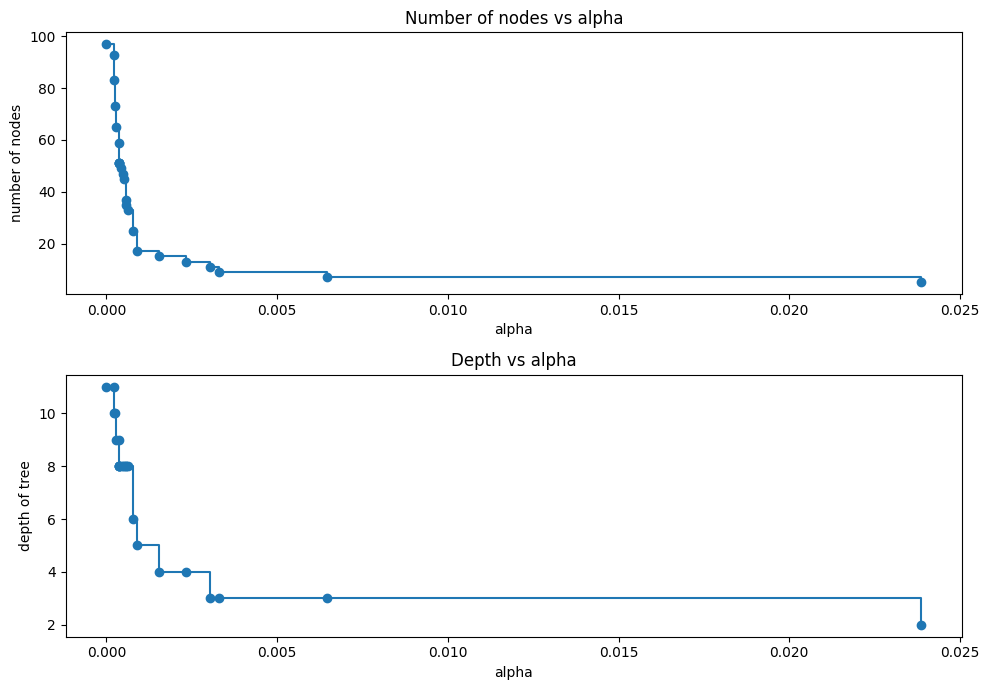

In [74]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

**Recall vs alpha (Training and Testing)**

In [75]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

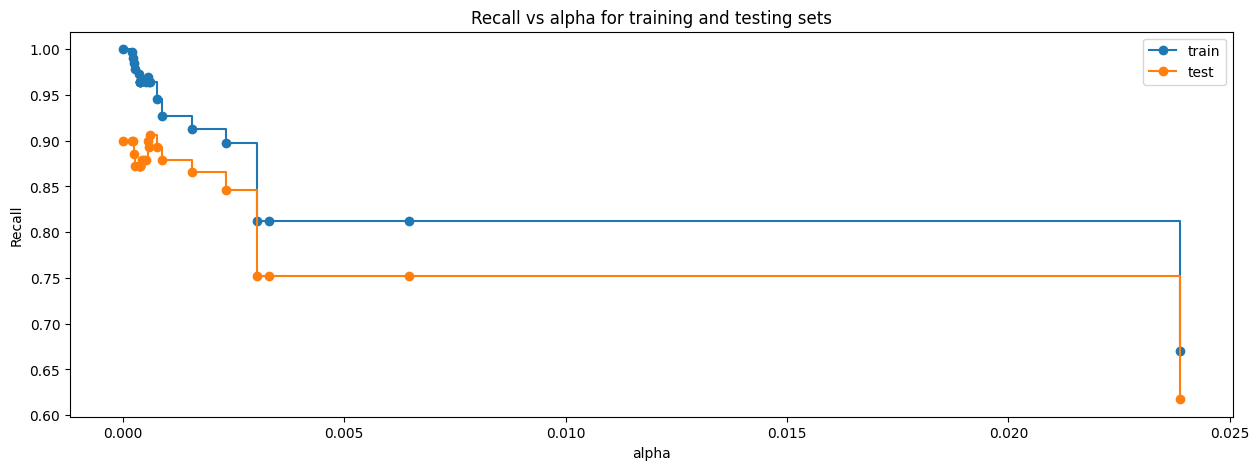

In [76]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [77]:
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0006209286209286216, random_state=1)


**Post-Pruning**

In [78]:
estimator_2 = DecisionTreeClassifier(
    ccp_alpha=0.000620986209286216, class_weight={0: 0.15, 1: 0.85}, random_state=1
)
estimator_2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.000620986209286216,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)

**Model Performance (Traning Data)**

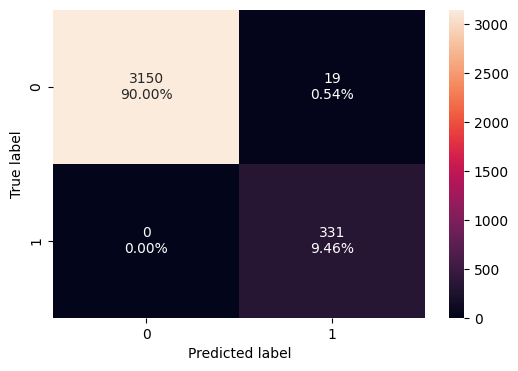

In [79]:
confusion_matrix_sklearn(estimator_2, X_train, y_train)

In [80]:
decision_tree_tune_post_train = model_performance_classification_sklearn(estimator_2, X_train, y_train)
decision_tree_tune_post_train

,Accuracy,Recall,Precision,F1
0,0.994571,1.0,0.945714,0.9721


**Decision Tree Visualization**

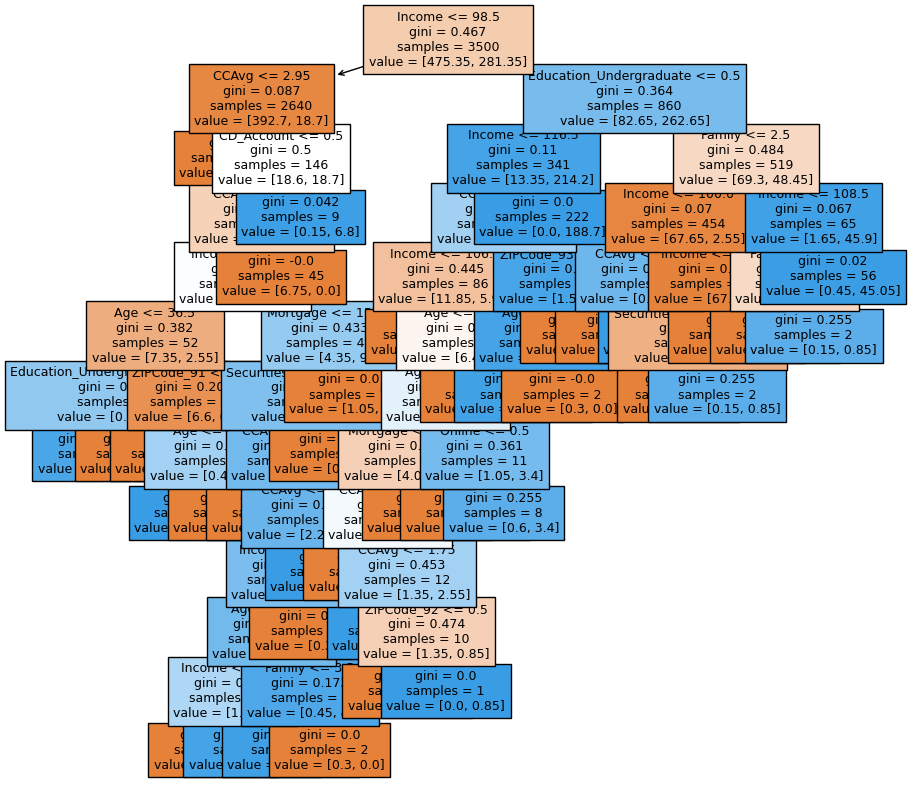

In [81]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    estimator_2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)

In [82]:
print(tree.export_text(estimator_2, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Income <= 81.50
|   |   |   |   |   |--- Age <= 36.50
|   |   |   |   |   |   |--- Education_Undergraduate <= 0.50
|   |   |   |   |   |   |   |--- weights: [0.15, 1.70] class: 1
|   |   |   |   |   |   |--- Education_Undergraduate >  0.50
|   |   |   |   |   |   |   |--- weights: [0.60, 0.00] class: 0
|   |   |   |   |   |--- Age >  36.50
|   |   |   |   |   |   |--- ZIPCode_91 <= 0.50
|   |   |   |   |   |   |   |--- weights: [6.15, 0.00] class: 0
|   |   |   |   |   |   |--- ZIPCode_91 >  0.50
|   |   |   |   |   |   |   |--- Age <= 46.00
|   |   |   |   |   |   |   |   |--- weights: [0.00, 0.85] class: 1
|   |   |   |   |   |   |   |--- Age >  46.00
|   |   |   |   |   |   |   |   |--- weights: [0.45, 0.00] class: 0
|   |   |   |   |--- Income >  81.50
|   |   |   |   |   |--- Mortgage <=

In [83]:
#Importances
print(
    pd.DataFrame(
        estimator_2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                              Imp
Income                   0.602209
Family                   0.144151
Education_Undergraduate  0.127332
CCAvg                    0.084681
Age                      0.011925
CD_Account               0.011166
Mortgage                 0.004929
Securities_Account       0.004788
ZIPCode_92               0.002996
ZIPCode_91               0.002635
Online                   0.001679
ZIPCode_93               0.001508
ZIPCode_94               0.000000
ZIPCode_95               0.000000
ZIPCode_96               0.000000
Education_Professional   0.000000
CreditCard               0.000000


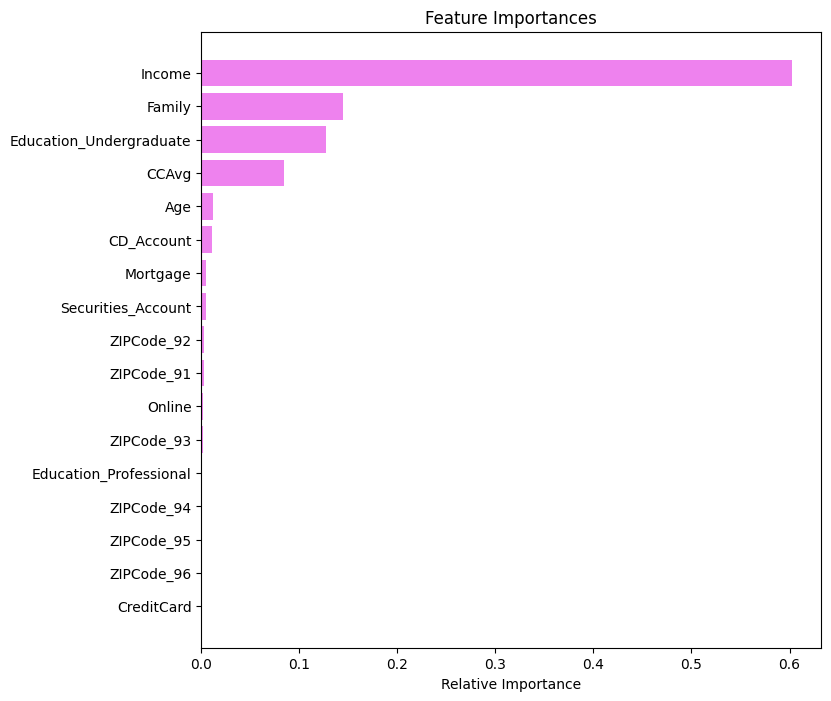

In [84]:
importances = estimator_2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


Model Performance (Testing Data)

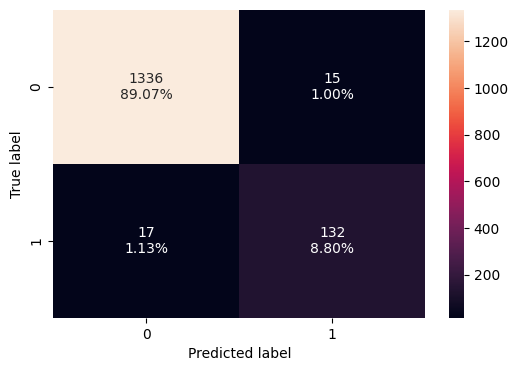

In [85]:
confusion_matrix_sklearn(estimator_2, X_test, y_test)

In [86]:
decision_tree_tune_post_test = model_performance_classification_sklearn(estimator_2, X_test, y_test)
decision_tree_tune_post_test

,Accuracy,Recall,Precision,F1
0,0.978667,0.885906,0.897959,0.891892


## Model Comparison and Final Model Selection

**Training Performance Comparison:**

In [87]:
models_train_comp_df = pd.concat(
    [decision_tree_perf_train.T, decision_tree_tune_perf_train.T,decision_tree_tune_post_train.T], axis=1,
)
models_train_comp_df.columns = ["Decision Tree sklearn", "Decision Tree (Pre-Pruning)","Decision Tree (Post-Pruning)"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,0.990286,0.994571
Recall,1.0,0.927492,1.000000
Precision,1.0,0.968454,0.945714
F1,1.0,0.947531,0.972100


**Testing Performance Comparison:**

In [88]:
models_test_comp_df = pd.concat(
    [decision_tree_perf_test.T, decision_tree_tune_perf_test.T,decision_tree_tune_post_test.T], axis=1,
)
models_test_comp_df.columns = ["Decision Tree sklearn", "Decision Tree (Pre-Pruning)","Decision Tree (Post-Pruning)"]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.981333,0.980000,0.978667
Recall,0.899329,0.865772,0.885906
Precision,0.911565,0.928058,0.897959
F1,0.905405,0.895833,0.891892


The highest Recall for the test data was the first Decision Tree, the second-highest was Post-Pruning, and the lowest was the Pre-Pruning model.

## Actionable Insights and Business Recommendations


* For the purpose of finding the best way of predicting whether or not a customer will buy personal loans, the first two things that should be taken into account should be whether the Customer has an Undergraduate education and the customer's Annual income. These variables are far and away the most important predictors given its extremely high Relative Importance compared to other metrics. The (Decision Tree sklearn, Decision Tree (Pre-Pruning) models highlighted the Education being the most important indicator, and Decision Tree (Post Pruning) showed a higher importance for Income.

* If the goal is to maximize the recall and prevent lost opportunities for someone to take out a Personal Loan, the model with the highest recall for the test data was the first model. Since this model is the most complex without any sort of pruning, it has the lowest chance at false negatives. However, if the bank is looking for a simpler tree with a slight decrease in recall, then the Post-Pruning Decision Tree is another great option. Keep in mind that this tree prioritizes Income more, but it does have less nodes with a very close Accuracy, Recall, and Precision. The Pre-Pruning Tree is more precise but has a lower recall due to its oversimplified nature All in all, the first decision tree's testing data only predicted 15 false negatives, the lowest out of the 3 models.

* My recommendation would be to market these personal loans to High-Income Professionals with at least 3 family members. From a customer standpoint, they are working to support their family, and may require a loan to buy a house/apartment, a car to get to work, etc. Regardless, pre-approving loans from these customers will give the bank a higher likelihood for collecting interest on personal loans.